In [1]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = fetch_california_housing()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

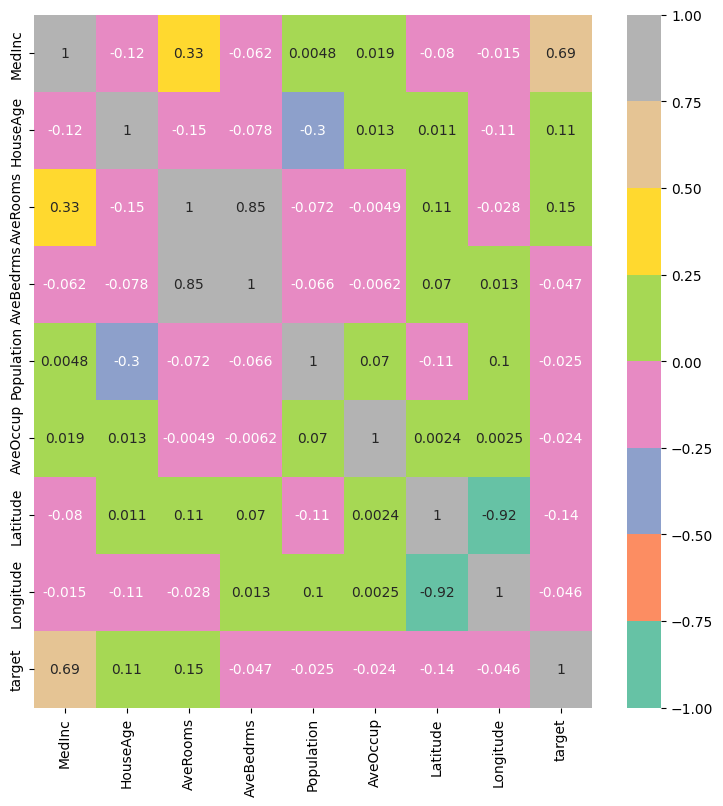

In [6]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='Set2',vmin=-1, vmax=1) # heat map can show relation b/w to feature at a time 
plt.show()

<Figure size 800x800 with 0 Axes>

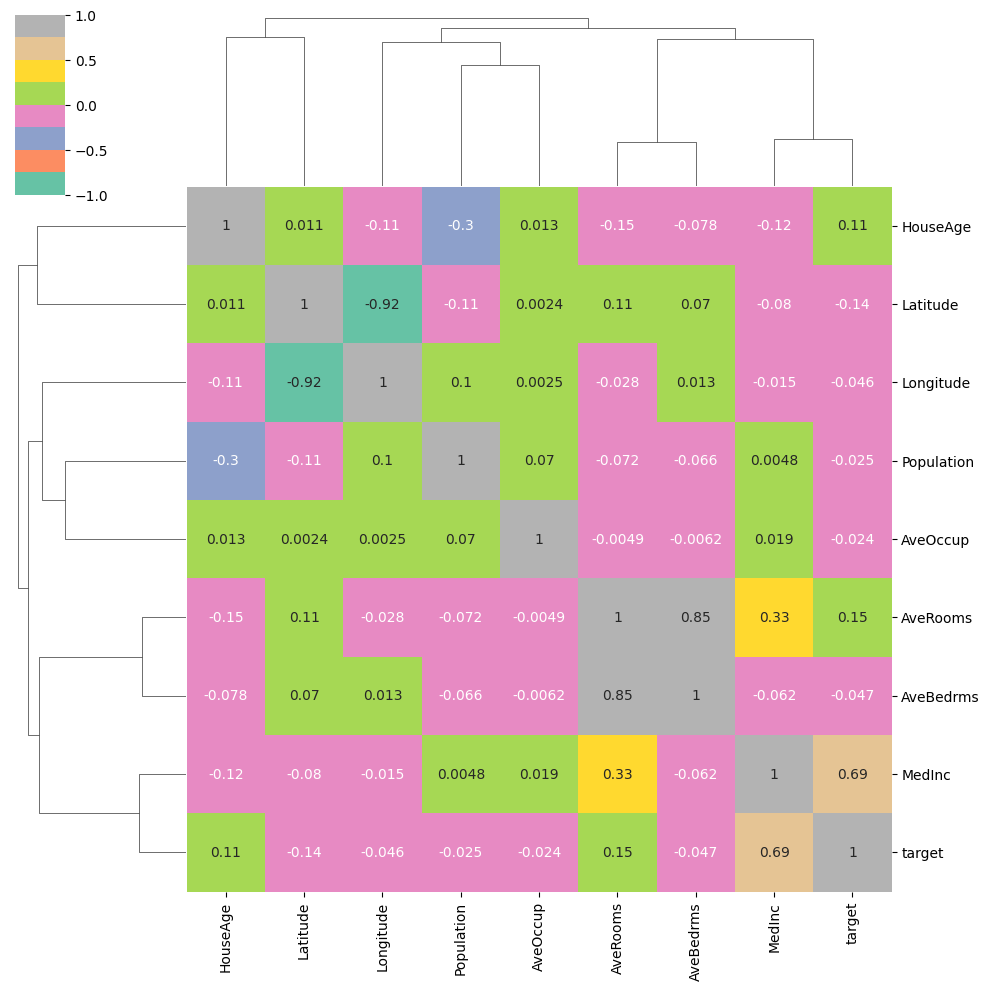

In [7]:
plt.figure(figsize=(8,8))
sns.clustermap(df.corr(), annot=True, cmap="Set2", vmin=-1, vmax=1)
plt.show()

In [8]:
df.values

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [9]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
vif = pd.DataFrame()
vif['features'] = df.columns

In [11]:
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [12]:
vif # if VIF>= 10 then we will drop that features one by one 

,features,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,target,9.285659


In [13]:
df1 = df.copy()

In [14]:
df1.drop('Longitude', axis= 1, inplace=True)


In [15]:
vif = pd.DataFrame()
vif['features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,features,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,target,9.193500


In [16]:
df1.drop('AveRooms', axis= 1, inplace=True)

In [17]:
vif = pd.DataFrame()
vif['features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,features,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,target,8.674858


In [18]:
df1.drop('Latitude', axis= 1, inplace=True)

In [19]:
vif = pd.DataFrame()
vif['features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,features,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,target,8.607339


In [ ]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()


In [36]:
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)


In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [40]:
regression.fit(X_train, y_train)

LinearRegression()

In [41]:
regression.coef_

array([ 0.8270914 ,  0.23933714,  0.02063258,  0.04250827, -0.05071786])

In [42]:
regression.intercept_

2.077350641957364

In [45]:
y_pred = regression.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

In [57]:
mae, mse, score

(0.6009793400064672, 0.6504069750823952, 0.5041461345294829)

In [60]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [61]:
# RFE >> Recursive feature elimination
from sklearn.feature_selection import RFE

In [62]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)

In [63]:
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [65]:
rfe.predict(X)

array([3.98910415, 4.03191679, 3.44103761, ..., 0.22630645, 0.36574672,
       0.57907858])

In [66]:
rfe.ranking_

array([1, 2, 1, 1, 4, 3, 1, 1])